<a href="https://colab.research.google.com/github/toruuno/DNN_d1d2/blob/master/2_4_optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

## Googleドライブのマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/lesson_2')
sys.path.append('/content/drive/My Drive/common')
sys.path.append('/content/drive/My Drive')

# optimizer

## SGD

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.19
                : 10. 正答率(テスト) = 0.1028
Generation: 20. 正答率(トレーニング) = 0.13
                : 20. 正答率(テスト) = 0.1006
Generation: 30. 正答率(トレーニング) = 0.11
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.11
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.11
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.11
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.09
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.09
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.12
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.12
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.11
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.07
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.16
                : 130. 正答率(テスト) = 0.1135
Generat

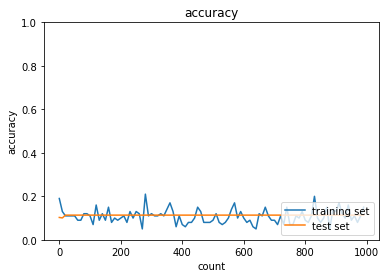

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================


network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Momentum

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.1
                : 20. 正答率(テスト) = 0.0982
Generation: 30. 正答率(トレーニング) = 0.13
                : 30. 正答率(テスト) = 0.0982
Generation: 40. 正答率(トレーニング) = 0.12
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.09
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.13
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.07
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.08
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.14
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.16
                : 100. 正答率(テスト) = 0.098
Generation: 110. 正答率(トレーニング) = 0.18
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.06
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.15
                : 130. 正答率(テスト) = 0.1135
Generatio

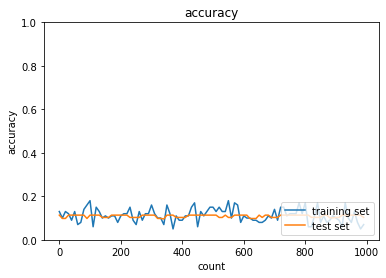

In [ ]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## MomentumをもとにAdaGradを作ってみよう
θ = 1e-4 とする

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.16
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.11
                : 20. 正答率(テスト) = 0.1009
Generation: 30. 正答率(トレーニング) = 0.06
                : 30. 正答率(テスト) = 0.1009
Generation: 40. 正答率(トレーニング) = 0.07
                : 40. 正答率(テスト) = 0.1009
Generation: 50. 正答率(トレーニング) = 0.13
                : 50. 正答率(テスト) = 0.1009
Generation: 60. 正答率(トレーニング) = 0.11
                : 60. 正答率(テスト) = 0.1009
Generation: 70. 正答率(トレーニング) = 0.06
                : 70. 正答率(テスト) = 0.1009
Generation: 80. 正答率(トレーニング) = 0.12
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.1
                : 90. 正答率(テスト) = 0.101
Generation: 100. 正答率(トレーニング) = 0.15
                : 100. 正答率(テスト) = 0.101
Generation: 110. 正答率(トレーニング) = 0.1
                : 110. 正答率(テスト) = 0.1009
Generation: 120. 正答率(トレーニング) = 0.14
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.11
                : 130. 正答率(テスト) = 0.1135
Generation:

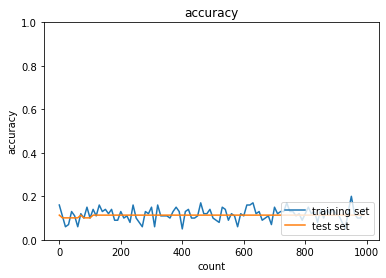

In [ ]:
# AdaGradを作ってみよう
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
# iters_num = 500 # 処理を短縮

train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

# AdaGradでは不必要
# =============================

#momentum = 0.9 
theta = 1e-4
# =============================

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
            
        # 変更しよう  
        # ===========================================
        if i == 0:
           h[key]  = np.full_like(network.params[key], theta)
        else:       
           h[key]  += np.square(grad[key])
        network.params[key] -= (learning_rate * grad[key]) / (np.sqrt(h[key]) + theta)
        # ===========================================
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## RSMprop

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.16
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.18
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.22
                : 30. 正答率(テスト) = 0.212
Generation: 40. 正答率(トレーニング) = 0.23
                : 40. 正答率(テスト) = 0.2131
Generation: 50. 正答率(トレーニング) = 0.27
                : 50. 正答率(テスト) = 0.2149
Generation: 60. 正答率(トレーニング) = 0.17
                : 60. 正答率(テスト) = 0.2153
Generation: 70. 正答率(トレーニング) = 0.19
                : 70. 正答率(テスト) = 0.2181
Generation: 80. 正答率(トレーニング) = 0.27
                : 80. 正答率(テスト) = 0.2369
Generation: 90. 正答率(トレーニング) = 0.3
                : 90. 正答率(テスト) = 0.2664
Generation: 100. 正答率(トレーニング) = 0.32
                : 100. 正答率(テスト) = 0.2617
Generation: 110. 正答率(トレーニング) = 0.31
                : 110. 正答率(テスト) = 0.2721
Generation: 120. 正答率(トレーニング) = 0.31
                : 120. 正答率(テスト) = 0.2991
Generation: 130. 正答率(トレーニング) = 0.37
                : 130. 正答率(テスト) = 0.2914
Generatio

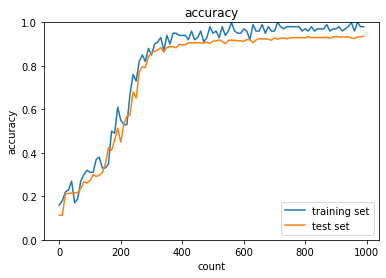

In [ ]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Adam

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13
                : 10. 正答率(テスト) = 0.1032
Generation: 20. 正答率(トレーニング) = 0.16
                : 20. 正答率(テスト) = 0.1502
Generation: 30. 正答率(トレーニング) = 0.09
                : 30. 正答率(テスト) = 0.1294
Generation: 40. 正答率(トレーニング) = 0.2
                : 40. 正答率(テスト) = 0.1947
Generation: 50. 正答率(トレーニング) = 0.24
                : 50. 正答率(テスト) = 0.196
Generation: 60. 正答率(トレーニング) = 0.23
                : 60. 正答率(テスト) = 0.1901
Generation: 70. 正答率(トレーニング) = 0.23
                : 70. 正答率(テスト) = 0.1964
Generation: 80. 正答率(トレーニング) = 0.21
                : 80. 正答率(テスト) = 0.1946
Generation: 90. 正答率(トレーニング) = 0.19
                : 90. 正答率(テスト) = 0.1909
Generation: 100. 正答率(トレーニング) = 0.22
                : 100. 正答率(テスト) = 0.1925
Generation: 110. 正答率(トレーニング) = 0.16
                : 110. 正答率(テスト) = 0.1936
Generation: 120. 正答率(トレーニング) = 0.28
                : 120. 正答率(テスト) = 0.1903
Generation: 130. 正答率(トレーニング) = 0.16
                : 130. 正答率(テスト) = 0.1947
Generatio

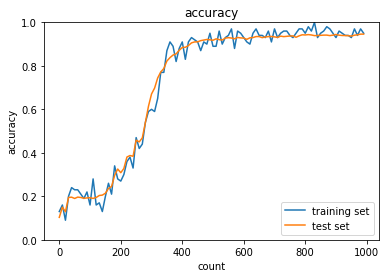

In [ ]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] 学習率を変えてみよう

## [try] 活性化関数と重みの初期化方法を変えてみよう
初期状態ではsigmoid - gauss<br>
activationはReLU、weight_init_stdは別の数値や'Xavier'・'He'に変更可能

## [try] バッチ正規化をしてみよう
use_batchnormをTrueにしよう

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#弄ったAdaGradをベースとしてTryする
#パラメータ変更を容易にする為関数化
#なおdebugオプションは学習進捗Logの抑制の為追加
def try_adagrad_func(learning_rate=0.01, use_batchnorm=False, activation='sigmoid', weight_init_std=0.01, debug=True):
    print("---------------------------------------")
    print("学習率:{} バッチ正規化:{}  活性化関数={} 初期化(数字の場合正規分布):{}".format(learning_rate, use_batchnorm, activation, weight_init_std))
    (x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

    if debug: print("データ読み込み完了")

    # batch_normalizationの設定 ================================
    # use_batchnorm = True
    # use_batchnorm = False
    # ====================================================

    network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation=activation, weight_init_std=weight_init_std,
                          use_batchnorm=use_batchnorm)

    iters_num = 1000
    # iters_num = 500 # 処理を短縮

    train_size = x_train.shape[0]
    batch_size = 100
    learning_rate = 0.01

    # AdaGradでは不必要
    # =============================

    #momentum = 0.9 
    theta = 1e-4
    # =============================

    train_loss_list = []
    accuracies_train = []
    accuracies_test = []

    plot_interval=10

    for i in range(iters_num):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        d_batch = d_train[batch_mask]

        # 勾配
        grad = network.gradient(x_batch, d_batch)
        if i == 0:
            h = {}
        for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
                
            # 変更しよう  
            # ===========================================
            if i == 0:
              h[key]  = np.full_like(network.params[key], theta)
            else:       
              h[key]  += np.square(grad[key])
            network.params[key] -= (learning_rate * grad[key]) / (np.sqrt(h[key]) + theta)
            # ===========================================
            
            loss = network.loss(x_batch, d_batch)
            train_loss_list.append(loss)
            
        if (i + 1) % plot_interval == 0:
            accr_test = network.accuracy(x_test, d_test)
            accuracies_test.append(accr_test)        
            accr_train = network.accuracy(x_batch, d_batch)
            accuracies_train.append(accr_train)

            if debug: print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            if debug: print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
            
            
    lists = range(0, iters_num, plot_interval)
    plt.plot(lists, accuracies_train, label="training set")
    plt.plot(lists, accuracies_test,  label="test set")
    plt.legend(loc="lower right")
    plt.title("accuracy")
    plt.xlabel("count")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.grid()

    # グラフの表示
    plt.show()

---------------------------------------
学習率:0.01 バッチ正規化:False  活性化関数=sigmoid 初期化(数字の場合正規分布):0.1


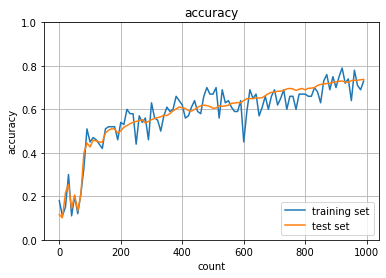

---------------------------------------
学習率:0.1 バッチ正規化:False  活性化関数=sigmoid 初期化(数字の場合正規分布):0.1


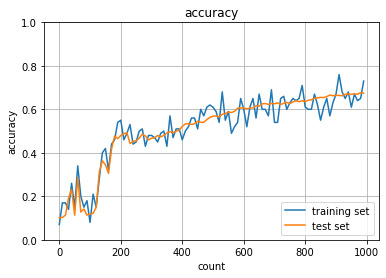

---------------------------------------
学習率:1 バッチ正規化:False  活性化関数=sigmoid 初期化(数字の場合正規分布):0.1


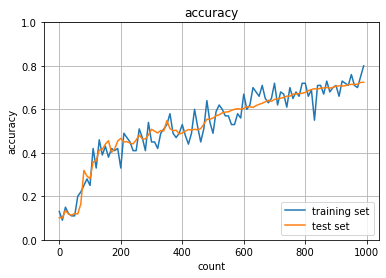

In [ ]:
#学習率の変更(活性化関数:sigmoid 初期化は正規分布)
try_adagrad_func(learning_rate=0.01, use_batchnorm=False, activation='sigmoid', weight_init_std=0.1, debug=False)
try_adagrad_func(learning_rate=0.1, use_batchnorm=False, activation='sigmoid', weight_init_std=0.1, debug=False)
try_adagrad_func(learning_rate=1, use_batchnorm=False, activation='sigmoid', weight_init_std=0.1, debug=False)

---------------------------------------
学習率:0.01 バッチ正規化:False  活性化関数=sigmoid 初期化(数字の場合正規分布):Xavier


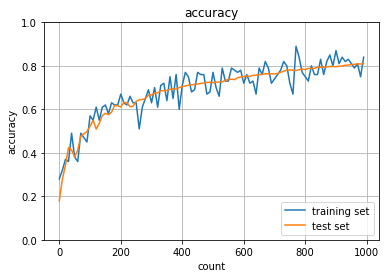

---------------------------------------
学習率:0.1 バッチ正規化:False  活性化関数=sigmoid 初期化(数字の場合正規分布):Xavier


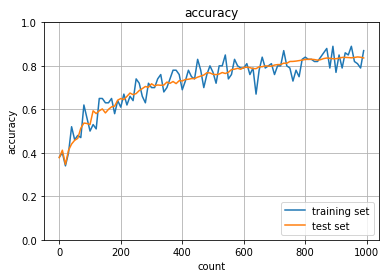

---------------------------------------
学習率:1 バッチ正規化:False  活性化関数=sigmoid 初期化(数字の場合正規分布):Xavier


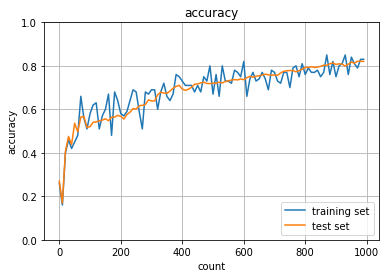

In [ ]:
#学習率の変更(活性化関数:sigmoid 初期化はXavier)
try_adagrad_func(learning_rate=0.01, use_batchnorm=False, activation='sigmoid', weight_init_std='Xavier', debug=False)
try_adagrad_func(learning_rate=0.1, use_batchnorm=False, activation='sigmoid', weight_init_std='Xavier', debug=False)
try_adagrad_func(learning_rate=1, use_batchnorm=False, activation='sigmoid', weight_init_std='Xavier', debug=False)

---------------------------------------
学習率:0.01 バッチ正規化:True  活性化関数=sigmoid 初期化(数字の場合正規分布):Xavier


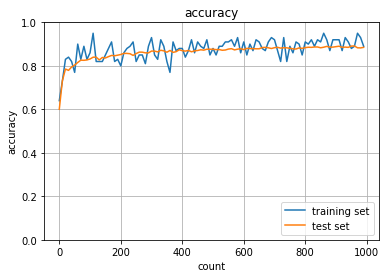

In [ ]:
#習率=0.01固定(活性化関数:sigmoid 初期化はXavier) バッチ正規化ON
try_adagrad_func(learning_rate=0.01, use_batchnorm=True, activation='sigmoid', weight_init_std='Xavier', debug=False)

---------------------------------------
学習率:0.01 バッチ正規化:False  活性化関数=relu 初期化(数字の場合正規分布):He


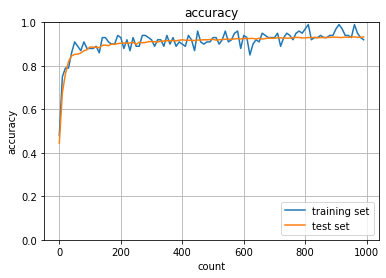

In [ ]:
#学習率=0.01固定(活性化関数:relu 初期化はHe) バッチ正規化Off
try_adagrad_func(learning_rate=0.01, use_batchnorm=False, activation='relu', weight_init_std='He', debug=False)

---------------------------------------
学習率:0.01 バッチ正規化:True  活性化関数=relu 初期化(数字の場合正規分布):He


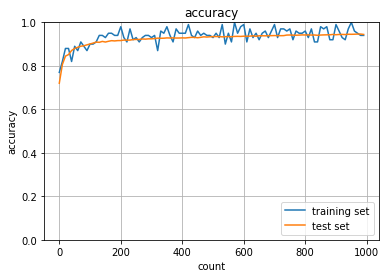

In [ ]:
#学習率=0.01固定(活性化関数:relu 初期化はHe) バッチ正規化ON
try_adagrad_func(learning_rate=0.01, use_batchnorm=True, activation='relu', weight_init_std='He', debug=False)